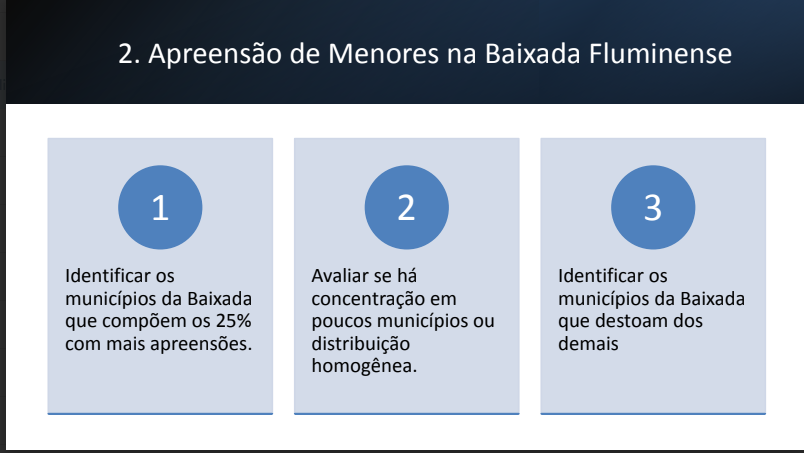

In [12]:
import pandas as pd
import numpy as np

In [14]:
base_dados = pd.read_csv("BaseDPEvolucaoMensalCisp.csv",sep = ";", encoding="latin1")
base_dados.columns

Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [ ]:
base_baixada = base_dados[base_dados["regiao"] == "Baixada Fluminense" ]
base_baixada.columns

In [26]:
df = pd.read_csv("base_baixada.csv", sep=";", encoding="latin1")

In [27]:
df = df.groupby("munic")[['aaapai']].sum().reset_index()
df

,munic,aaapai
0,Belford Roxo,2584.0
1,Duque de Caxias,6233.0
2,Guapimirim,213.0
3,Itaguaí,881.0
4,Japeri,402.0
5,Magé,1251.0
6,Magé;Guapimirim,126.0
7,Mesquita,1218.0
8,Nilópolis,693.0
9,Nova Iguaçu,4098.0


In [28]:
df = df.values
df

array([['Belford Roxo', 2584.0],
       ['Duque de Caxias', 6233.0],
       ['Guapimirim', 213.0],
       ['Itaguaí', 881.0],
       ['Japeri', 402.0],
       ['Magé', 1251.0],
       ['Magé;Guapimirim', 126.0],
       ['Mesquita', 1218.0],
       ['Nilópolis', 693.0],
       ['Nova Iguaçu', 4098.0],
       ['Paracambi', 366.0],
       ['Queimados', 573.0],
       ['Queimados;Japeri', 0.0],
       ['Seropédica', 309.0],
       ['São João de Meriti', 2953.0]], dtype=object)

In [33]:
valores = df[:, 1].astype(float)

Q1 = np.percentile(valores, 25)
Q3 = np.percentile(valores, 75)
iqr = Q3 - Q1

inf = Q1 - 1.5 * iqr
sup = Q3 + 1.5 * iqr

outliers = (valores > sup)

municipios_outliers = df[outliers, 0]
municipios_outliers


array(['Duque de Caxias'], dtype=object)